In [1]:
%env KIF_DEBUG=
%env KIF_RESOLVE_ENTITIES=1

env: KIF_DEBUG=
env: KIF_RESOLVE_ENTITIES=1


# PubChem

In [2]:
from kif_lib import *
from kif_lib.vocabulary import pc, wd

Create a SPARQL store with PubChem mappings pointing to a PubChem RDF SPARQL endpoint:

In [3]:
import os
kb = Store('pubchem-sparql', os.getenv('PUBCHEM', 'https://qlever.cs.uni-freiburg.de/api/pubchem'))

If a limit on the number of results is not specified, assume 3:

In [4]:
kb.limit = 3

## Label, aliases, and description (pseudo-properties)

Gets the label of benzene (CID 241) in English:

In [5]:
it = kb.filter(subject=pc.CID(241), property=wd.label, language='en')
display(*it)

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** **LabelProperty** "benzene"@en))

Gets the aliases of benzene in English:

In [6]:
it = kb.filter(subject=pc.CID(241), property=wd.alias, language='en')
display(*it)

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** **AliasProperty** "\[6]annulene"@en))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** **AliasProperty** "Benzen"@en))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** **AliasProperty** "benzene"@en))

Gets the description of benzene in English:

In [7]:
it = kb.filter(subject=pc.CID(241), property=wd.description, language='en')
display(*it)

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** **DescriptionProperty** "A six-carbon aromatic annulene in which each carbon atom donates one of its two 2p electrons into a delocalised pi system. A toxic, flammable liquid byproduct of coal distillation, it is used as an industrial solvent. Benzene is a carcinogen that also damages bone marrow and the central nervous system."@en))

Notice that we search for entities with a given label:

## Compounds

These are the currently supported properties for compounds:

In [8]:
COMPOUND_PROPERTIES = [
    wd.canonical_SMILES,
    wd.CAS_Registry_Number,
    wd.ChEBI_ID,
    wd.ChEMBL_ID,
    wd.chemical_formula,
    wd.described_by_source,
    wd.has_part,
    wd.part_of,
    wd.InChI,
    wd.InChIKey,
    wd.instance_of,
    wd.isomeric_SMILES,
    pc.isotope_atom_count,          # pc vocabulary
    pc.IUPAC_name,                  # pc vocabulary
    wd.legal_status_medicine,
    wd.mass,
    wd.manufacturer,
    wd.partition_coefficient_water_octanol,
    wd.PubChem_CID,
    wd.said_to_be_the_same_as,
]

In [9]:
import show
show.property_table(COMPOUND_PROPERTIES)

|#|property|description|
|-|-|-|
|1|[canonical SMILES](http://www.wikidata.org/entity/P233)|Simplified Molecular Input Line Entry Specification (canonical format)|
|2|[CAS Registry Number](http://www.wikidata.org/entity/P231)|identifier for a chemical substance or compound per Chemical Abstract Service's Registry database|
|3|[ChEBI ID](http://www.wikidata.org/entity/P683)|identifier from database and ontology of molecular entities focused on 'small' chemical compounds|
|4|[ChEMBL ID](http://www.wikidata.org/entity/P592)|identifier from a chemical database of bioactive molecules with drug-like properties|
|5|[chemical formula](http://www.wikidata.org/entity/P274)|description of chemical compound giving element symbols and counts|
|6|[described by source](http://www.wikidata.org/entity/P1343)|work where this item is described|
|7|[has part(s)](http://www.wikidata.org/entity/P527)|part of this subject; inverse property of "part of" (P361). See also "has parts of the class" (P2670).|
|8|[part of](http://www.wikidata.org/entity/P361)|object of which the subject is a part (if this subject is already part of object A which is a part of object B, then please only make the subject part of object A), inverse property of "has part" (P527, see also "has parts of the class" (P2670))|
|9|[InChI](http://www.wikidata.org/entity/P234)|International Chemical Identifier|
|10|[InChIKey](http://www.wikidata.org/entity/P235)|a hashed version of the full standard InChI|
|11|[instance of](http://www.wikidata.org/entity/P31)|type to which this subject corresponds/belongs. Different from P279 (subclass of); for example: K2 is an instance of mountain; volcanoes form a subclass of mountains, and the volcano is a type (instance) of volcanic landform|
|12|[isomeric SMILES](http://www.wikidata.org/entity/P2017)|dedicated SMILES for isomer|
|13|[isotope atom count](http://semanticscience.org/resource/CHEMINF_000372)|isotope atom count generated by pubchem software library|
|14|[IUPAC name](http://semanticscience.org/resource/CHEMINF_000382)|IUPAC Name generated by LexiChem|
|15|[legal status (medicine)](http://www.wikidata.org/entity/P3493)|legal status for pharmaceutical drugs, e.g. general sales list for paracetamol in the UK|
|16|[mass](http://www.wikidata.org/entity/P2067)|mass (in colloquial usage also known as weight) of the item|
|17|[manufacturer](http://www.wikidata.org/entity/P176)|(main or final) manufacturer or producer of this product|
|18|[partition coefficient water/octanol](http://www.wikidata.org/entity/P2993)|logarithm of the partition coefficient (n-octanol/water)|
|19|[PubChem CID](http://www.wikidata.org/entity/P662)|identifier from database of chemical molecules and their activities in biological assays (Compound ID number)|
|20|[said to be the same as](http://www.wikidata.org/entity/P460)|this item is said to be the same as that item, though this may be uncertain or disputed|

Lists some of the values of these properties for benzene (CID 241):

In [10]:
f = lambda p: kb.filter(subject=pc.CID(241), property=p, limit=1)

In [11]:
import itertools
it = list(itertools.chain(*map(f, COMPOUND_PROPERTIES)))
display(*it)

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [canonical SMILES](http://www.wikidata.org/entity/P233)) "C1=CC=CC=C1"))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [CAS Registry Number](http://www.wikidata.org/entity/P231)) "25053-22-9"))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [ChEBI ID](http://www.wikidata.org/entity/P683)) "16716"))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [ChEMBL ID](http://www.wikidata.org/entity/P592)) "CHEMBL277500"))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [chemical formula](http://www.wikidata.org/entity/P274)) "C₆H₆"))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [described by source](http://www.wikidata.org/entity/P1343)) (**Item** [Certain 1, 4, 5-Tri-substituted imidazole compounds useful as cytokine.](http://rdf.ncbi.nlm.nih.gov/pubchem/patent/AP-1270-A))))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [part of](http://www.wikidata.org/entity/P361)) (**Item** [pc:CID10020804](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID10020804))))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [InChI](http://www.wikidata.org/entity/P234)) "InChI=1S/C6H6/c1-2-4-6-5-3-1/h1-6H"))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [InChIKey](http://www.wikidata.org/entity/P235)) "UHOVQNZJYSORNB-UHFFFAOYSA-N"))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [instance of](http://www.wikidata.org/entity/P31)) (**Item** [type of a chemical entity](http://www.wikidata.org/entity/Q113145171))))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [isomeric SMILES](http://www.wikidata.org/entity/P2017)) "C1=CC=CC=C1"))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [isotope atom count](http://semanticscience.org/resource/CHEMINF_000372)) (**Quantity** 0)))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [IUPAC name](http://semanticscience.org/resource/CHEMINF_000382)) "\[6]annulene"@en))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 78.047 (**Item** [dalton](http://www.wikidata.org/entity/Q483261)))))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [manufacturer](http://www.wikidata.org/entity/P176)) (**Item** [AKos Consulting & Solutions](http://rdf.ncbi.nlm.nih.gov/pubchem/source/AKos_Consulting___Solutions))))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [partition coefficient water/octanol](http://www.wikidata.org/entity/P2993)) (**Quantity** 2.1)))

(**Statement** (**Item** [benzene](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID241)) (**ValueSnak** (**Property** [PubChem CID](http://www.wikidata.org/entity/P662)) "241"))

Note that these stmts can be seen as forming a graph about benzene:

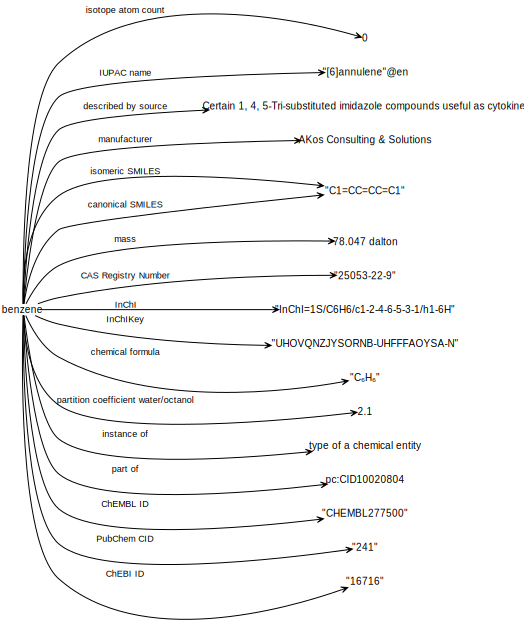

In [12]:
Graph(*it).to_graphviz()

Another example: Lists the mass of some compounds whose chemical formula is H2O (*with annotations*):

In [13]:
it = kb.filter(subject=wd.chemical_formula('H2O'), property=wd.mass, annotated=True)
display(*it)

(**AnnotatedStatement** (**Item** [oxygen-15 atom](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID10129877)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 17.0187 (**Item** [dalton](http://www.wikidata.org/entity/Q483261))))
- (**QualifierRecord**)
- (**ReferenceRecordSet**)
- **NormalRank**)

(**AnnotatedStatement** (**Item** [oxygen-17 atom](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID10197601)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 19.0148 (**Item** [dalton](http://www.wikidata.org/entity/Q483261))))
- (**QualifierRecord**)
- (**ReferenceRecordSet**)
- **NormalRank**)

(**AnnotatedStatement** (**Item** [oxygen-16 atom](http://rdf.ncbi.nlm.nih.gov/pubchem/compound/CID10214376)) (**ValueSnak** (**Property** [mass](http://www.wikidata.org/entity/P2067)) (**Quantity** 18.0106 (**Item** [dalton](http://www.wikidata.org/entity/Q483261))))
- (**QualifierRecord**)
- (**ReferenceRecordSet**)
- **NormalRank**)

## Patents

In [14]:
PATENT_PROPERTIES = [
    wd.author_name_string,
    wd.instance_of,
    wd.main_subject,
    wd.patent_number,
    wd.publication_date,
    wd.sponsor,
    wd.title,
]

In [15]:
show.property_table(PATENT_PROPERTIES)

|#|property|description|
|-|-|-|
|1|[author name string](http://www.wikidata.org/entity/P2093)|stores unspecified author or editor name for publications; use if Wikidata item for author (P50) or editor (P98) does not exist or is not known. Do not use both.|
|2|[instance of](http://www.wikidata.org/entity/P31)|type to which this subject corresponds/belongs. Different from P279 (subclass of); for example: K2 is an instance of mountain; volcanoes form a subclass of mountains, and the volcano is a type (instance) of volcanic landform|
|3|[main subject](http://www.wikidata.org/entity/P921)|primary topic of a work|
|4|[patent number](http://www.wikidata.org/entity/P1246)|identifier for a patented invention|
|5|[publication date](http://www.wikidata.org/entity/P577)|date or point in time when a work was first published or released|
|6|[sponsor](http://www.wikidata.org/entity/P859)|organization or individual that sponsors this item|
|7|[title](http://www.wikidata.org/entity/P1476)|published name of a work, such as a newspaper article, a literary work, piece of music, a website, or a performance work|

Lists some of the values of these properties for AU-2012245199-A1:

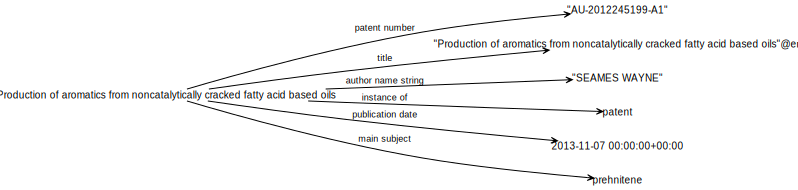

In [16]:
f = lambda p: kb.filter(subject=pc.patent('AU-2012245199-A1'), property=p, limit=1)
Graph(*itertools.chain(*map(f, PATENT_PROPERTIES))).to_graphviz()

## Sources (vendors)

In [17]:
SOURCE_PROPERTIES = [
    wd.instance_of,
    wd.official_website,
]

In [18]:
show.property_table(SOURCE_PROPERTIES)

|#|property|description|
|-|-|-|
|1|[instance of](http://www.wikidata.org/entity/P31)|type to which this subject corresponds/belongs. Different from P279 (subclass of); for example: K2 is an instance of mountain; volcanoes form a subclass of mountains, and the volcano is a type (instance) of volcanic landform|
|2|[official website](http://www.wikidata.org/entity/P856)|URL of the official page of an item (current or former). Usage: If a listed URL no longer points to the official website, do not remove it, but see the "Hijacked or dead websites" section of the Talk page|

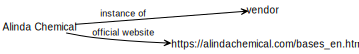

In [19]:
f = lambda p: kb.filter(subject=pc.source('Alinda_Chemical'), property=p, limit=1)
Graph(*itertools.chain(*map(f, SOURCE_PROPERTIES))).to_graphviz()